# HGRF: General XY Model
---
This notebook plots the diffusion matrices defined by the source C code [1]

The python wrapper pynoisy [2] is introduced and the parameters defined by the general xy model (src/model_general_xy.c) are plotted. pynoisy has a modified verions of [1] which is used to define general matrices as inputs to the advection-diffusion solver. 

[1] https://github.com/AFD-Illinois/inoisy

[2] https://github.com/aviadlevis/pynoisy

In [1]:
import pynoisy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

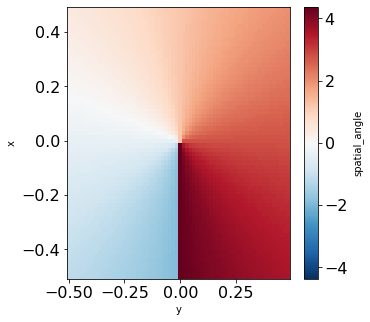

In [2]:
"""
Define a diffusion xr.dataset and plot the principle axis of the diffusion tensor
"""
diffusion = pynoisy.diffusion.general_xy(nx=64, ny=64)

%matplotlib inline
plt.figure(figsize=(5,5))
diffusion.spatial_angle.plot()

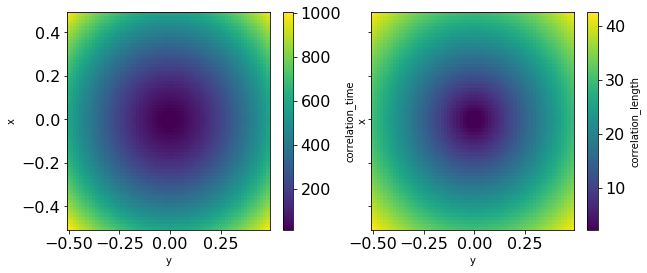

In [3]:
"""
Plot the correlation time and diffusion coefficient
"""
%matplotlib inline
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10,4))
diffusion.correlation_time.plot(ax=ax[0])
diffusion.correlation_length.plot(ax=ax[1])

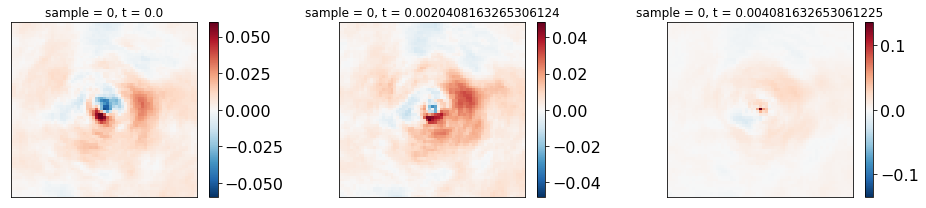

In [6]:
"""
Run Noisy which solves the Advection-Diffusion stochastic PDE.
Plot the first couple of images.
"""
solver = pynoisy.forward.HGRFSolver(64, 64, diffusion)
grf = solver.run(maxiter=20, num_frames=50)

%matplotlib inline
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(13,3))
for i in range(3):
    grf.isel(t=i).plot(ax=ax[i])
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
plt.tight_layout()